In [6]:
import tensorflow as tf
import numpy as np

def load_and_preprocess_data():
    """Loads and preprocesses the Fashion MNIST dataset."""
    # Load the Fashion MNIST dataset
    (x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

    # Normalize the pixel values to be between 0 and 1
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    # Reshape the data to flatten the images into vectors
    x_train = x_train.reshape((len(x_train), 28 * 28))
    x_test = x_test.reshape((len(x_test), 28 * 28))

    return x_train, x_test

# Move the assignment of x_train and x_test outside the if __name__ == "__main__": block
print("Loading and preprocessing data...")
x_train, x_test = load_and_preprocess_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

Loading and preprocessing data...
Shape of x_train: (60000, 784)
Shape of x_test: (10000, 784)


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import os

def build_autoencoder(input_dim, latent_dim):
    """Builds and compiles the autoencoder model."""
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    latent_representation = Dense(latent_dim, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(latent_representation)
    decoded = Dense(128, activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)

    # Encoder model
    encoder = Model(input_layer, latent_representation)

    # Decoder model
    encoded_input = Input(shape=(latent_dim,))
    decoder_layers = autoencoder.layers[-3](encoded_input)
    decoder_layers = autoencoder.layers[-2](decoder_layers)
    decoder_layers = autoencoder.layers[-1](decoder_layers)
    decoder = Model(encoded_input, decoder_layers)

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder, encoder, decoder

def train_autoencoder(autoencoder, x_train, x_test, epochs=20, batch_size=128):
    """Trains the autoencoder model."""
    print("Training autoencoder...")
    history = autoencoder.fit(x_train, x_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              shuffle=True,
                              validation_data=(x_test, x_test))
    return history

def save_models(encoder, decoder, output_dir="."):
    """Saves the encoder and decoder models."""
    os.makedirs(output_dir, exist_ok=True)
    encoder_path = os.path.join(output_dir, "encoder_model.h5")
    decoder_path = os.path.join(output_dir, "decoder_model.h5")
    encoder.save(encoder_path)
    decoder.save(decoder_path)
    print(f"Encoder model saved to {encoder_path}")
    print(f"Decoder model saved to {decoder_path}")

if __name__ == "__main__":
    print("Building and training autoencoder model...")
    input_dim = 28 * 28
    latent_dim = 32
    # Removed the call to load_and_preprocess_data() as x_train and x_test are already available
    autoencoder, encoder, decoder = build_autoencoder(input_dim, latent_dim)
    autoencoder.summary()
    train_autoencoder(autoencoder, x_train, x_test)
    save_models(encoder, decoder)
    print("Model training and saving complete.")

Building and training autoencoder model...


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Training autoencoder...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.4070 - val_loss: 0.3109
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3057 - val_loss: 0.2999
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2963 - val_loss: 0.2946
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2916 - val_loss: 0.2911
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2880 - val_loss: 0.2893
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2869 - val_loss: 0.2871
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2837 - val_loss: 0.2861
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.2833 - val_loss: 0.2844
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2818 - val_loss: 0.2829
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2805 - val_loss: 0.2821
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2794 - val_loss: 0.2814
Epoch 12/20
469/469 ━━━

Encoder model saved to ./encoder_model.h5
Decoder model saved to ./decoder_model.h5
Model training and saving complete.


In [8]:
from google.colab import files

# Download the encoder and decoder model files
files.download('encoder_model.h5')
files.download('decoder_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generating pseudo-random data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Shape of generated_data: (25, 784)


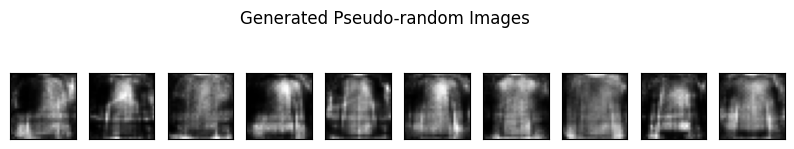

Pseudo-random data generation complete.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


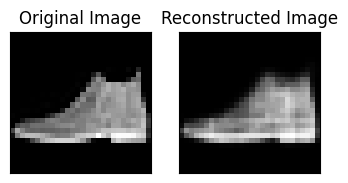

In [10]:
import matplotlib.pyplot as plt

# Select a test image (e.g., the first image in the test set)
test_image = x_test[0].reshape(1, input_dim)

# Encode the test image
encoded_image = encoder.predict(test_image)

# Decode the encoded image
reconstructed_image = decoder.predict(encoded_image)

# Reshape the original and reconstructed images for display
original_image_display = test_image.reshape(28, 28)
reconstructed_image_display = reconstructed_image.reshape(28, 28)

# Display the original and reconstructed images
plt.figure(figsize=(4, 2))
ax = plt.subplot(1, 2, 1)
plt.imshow(original_image_display, cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Original Image")

ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_display, cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Reconstructed Image")

plt.show()
